<a href="https://colab.research.google.com/github/2303a52483/23CSBTB44/blob/main/Generative_AI_Projectwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
d=pd.read_csv("/content/diabetes_young_adults_india.csv")
print(d)

          ID   Age  Gender     Region  Family_Income Family_History_Diabetes  \
0          1  21.0    Male      North      2209393.0                      No   
1          2  18.0  Female    Central       387650.0                      No   
2          3  25.0    Male      North       383333.0                      No   
3          4  22.0    Male  Northeast      2443733.0                      No   
4          5  19.0    Male    Central      1449463.0                      No   
...      ...   ...     ...        ...            ...                     ...   
29497  29498  15.0    Male      North       476913.0                      No   
29498  29499  23.0  Female      North      1391463.0                     Yes   
29499  29500  19.0    Male      North      1480815.0                      No   
29500  29501  20.0   Other  Northeast      1949937.0                      No   
29501  29502   NaN     NaN        NaN            NaN                     NaN   

      Parent_Diabetes_Type  Genetic_Ris

Epoch 1/50
2486/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5023 - loss: 0.7468
Epoch 1: val_loss improved from inf to 0.69927, saving model to best_ann_model.h5


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.5022 - loss: 0.7466 - val_accuracy: 0.4071 - val_loss: 0.6993 - learning_rate: 0.0010
Epoch 2/50
2498/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4877 - loss: 0.6959
Epoch 2: val_loss improved from 0.69927 to 0.69713, saving model to best_ann_model.h5


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.4877 - loss: 0.6959 - val_accuracy: 0.4031 - val_loss: 0.6971 - learning_rate: 0.0010
Epoch 3/50
2492/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4859 - loss: 0.6944
Epoch 3: val_loss improved from 0.69713 to 0.69521, saving model to best_ann_model.h5


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.4859 - loss: 0.6944 - val_accuracy: 0.4461 - val_loss: 0.6952 - learning_rate: 0.0010
Epoch 4/50
2496/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4798 - loss: 0.6940
Epoch 4: val_loss improved from 0.69521 to 0.68805, saving model to best_ann_model.h5


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.4798 - loss: 0.6940 - val_accuracy: 0.6517 - val_loss: 0.6881 - learning_rate: 0.0010
Epoch 5/50
2493/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5752 - loss: 0.6922
Epoch 5: val_loss did not improve from 0.68805
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5750 - loss: 0.6922 - val_accuracy: 0.3287 - val_loss: 0.6986 - learning_rate: 0.0010
Epoch 6/50
2497/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4491 - loss: 0.6925
Epoch 6: val_loss did not improve from 0.68805
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.4491 - loss: 0.6925 - val_accuracy: 0.3730 - val_loss: 0.6967 - learning_rate: 0.0010
Epoch 7/50
2483/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4858 - loss: 0.6924
Epoch 7: val_loss did not improve from 0.68805
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.4857 - loss: 0.6925 - val_accuracy: 0.4606 - val_loss: 0.6931 - learning_rate: 0.0010
Epoch 8/50
2483/2500

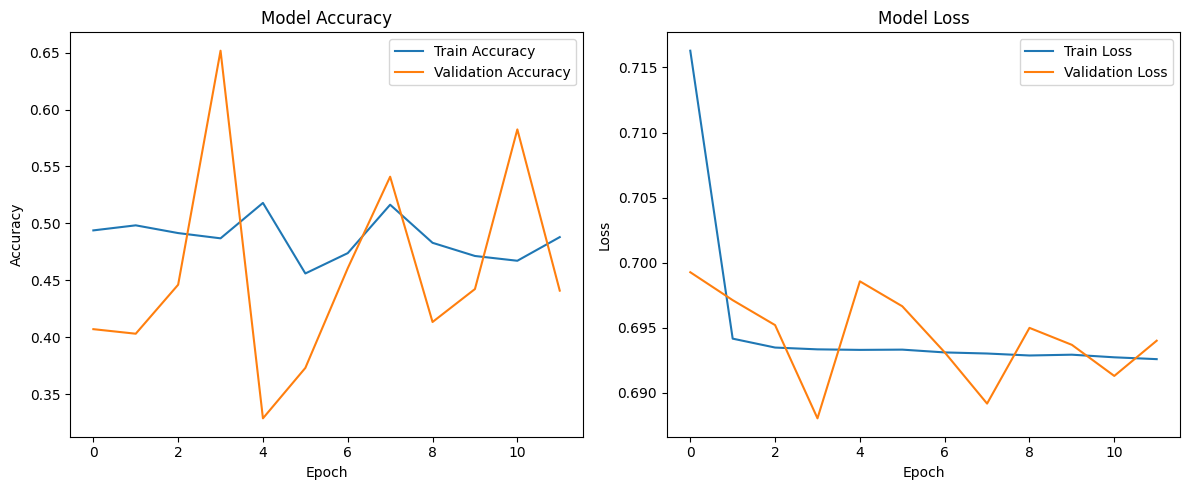

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# ------------------ Load Dataset ------------------
df = pd.read_csv("/content/diabetes_young_adults_india.csv")

# Drop ID column if present
if "ID" in df.columns:
    df.drop("ID", axis=1, inplace=True)

# ------------------ Convert Target Column to Binary ------------------
df["Prediabetes"] = df["Prediabetes"].map({"No": 0, "Yes": 1})

# ------------------ Encode Categorical Columns ------------------
for col in df.columns:
    if df[col].dtype == 'object':
        if df[col].nunique() == 2:
            df[col] = LabelEncoder().fit_transform(df[col])
        else:
            df = pd.get_dummies(df, columns=[col], drop_first=True)

# ------------------ Prepare Features and Target ------------------
X = df.drop("Prediabetes", axis=1)
y = df["Prediabetes"]

# ------------------ Scale Features ------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------ Split Data ------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# ------------------ Handle Class Imbalance ------------------
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

# ------------------ Build ANN Model ------------------
inputs = Input(shape=(X_train.shape[1],))
x = Dense(128, activation='relu')(inputs)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# ------------------ Define Callbacks ------------------
checkpoint = ModelCheckpoint("best_ann_model.h5", monitor='val_loss', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, verbose=1)

# ------------------ Train the Model ------------------
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[checkpoint, early_stopping, reduce_lr],
    verbose=1
)

# ------------------ Evaluate the Model ------------------
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {accuracy:.4f}")

# ------------------ Classification Report ------------------
y_pred = (model.predict(X_test) > 0.5).astype(int)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# ------------------ Plot Accuracy and Loss ------------------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4229 - loss: 0.9298
Epoch 1: val_loss improved from inf to 0.68864, saving model to best_lstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - accuracy: 0.4241 - loss: 0.9284 - val_accuracy: 0.6850 - val_loss: 0.6886 - learning_rate: 1.0000e-04
Epoch 2/15
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5182 - loss: 0.7985
Epoch 2: val_loss improved from 0.68864 to 0.68392, saving model to best_lstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5256 - loss: 0.7905 - val_accuracy: 0.6850 - val_loss: 0.6839 - learning_rate: 1.0000e-04
Epoch 3/15
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5768 - loss: 0.7114
Epoch 3: val_loss improved from 0.68392 to 0.68008, saving model to best_lstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5772 - loss: 0.7153 - val_accuracy: 0.6850 - val_loss: 0.6801 - learning_rate: 1.0000e-04
Epoch 4/15
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6142 - loss: 0.6906
Epoch 4: val_loss improved from 0.68008 to 0.67668, saving model to best_lstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6173 - loss: 0.6893 - val_accuracy: 0.6850 - val_loss: 0.6767 - learning_rate: 1.0000e-04
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6344 - loss: 0.6778
Epoch 5: val_loss improved from 0.67668 to 0.67303, saving model to best_lstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6332 - loss: 0.6787 - val_accuracy: 0.6850 - val_loss: 0.6730 - learning_rate: 1.0000e-04
Epoch 6/15
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6525 - loss: 0.6782
Epoch 6: val_loss improved from 0.67303 to 0.67042, saving model to best_lstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6505 - loss: 0.6821 - val_accuracy: 0.6850 - val_loss: 0.6704 - learning_rate: 1.0000e-04
Epoch 7/15
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6214 - loss: 0.6914
Epoch 7: val_loss improved from 0.67042 to 0.66768, saving model to best_lstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6199 - loss: 0.6915 - val_accuracy: 0.6850 - val_loss: 0.6677 - learning_rate: 1.0000e-04
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6399 - loss: 0.6660
Epoch 8: val_loss improved from 0.66768 to 0.66495, saving model to best_lstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6397 - loss: 0.6659 - val_accuracy: 0.6850 - val_loss: 0.6650 - learning_rate: 1.0000e-04
Epoch 9/15
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6644 - loss: 0.6306
Epoch 9: val_loss improved from 0.66495 to 0.66102, saving model to best_lstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6640 - loss: 0.6321 - val_accuracy: 0.6850 - val_loss: 0.6610 - learning_rate: 1.0000e-04
Epoch 10/15
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6809 - loss: 0.6166
Epoch 10: val_loss improved from 0.66102 to 0.65732, saving model to best_lstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6785 - loss: 0.6202 - val_accuracy: 0.6850 - val_loss: 0.6573 - learning_rate: 1.0000e-04
Epoch 11/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6800 - loss: 0.6293
Epoch 11: val_loss improved from 0.65732 to 0.65466, saving model to best_lstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6804 - loss: 0.6292 - val_accuracy: 0.6850 - val_loss: 0.6547 - learning_rate: 1.0000e-04
Epoch 12/15
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6637 - loss: 0.6596
Epoch 12: val_loss improved from 0.65466 to 0.65249, saving model to best_lstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6649 - loss: 0.6588 - val_accuracy: 0.6850 - val_loss: 0.6525 - learning_rate: 1.0000e-04
Epoch 13/15
24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6635 - loss: 0.6224
Epoch 13: val_loss improved from 0.65249 to 0.65068, saving model to best_lstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6632 - loss: 0.6233 - val_accuracy: 0.6850 - val_loss: 0.6507 - learning_rate: 1.0000e-04
Epoch 14/15
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6415 - loss: 0.6643
Epoch 14: val_loss improved from 0.65068 to 0.64988, saving model to best_lstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6475 - loss: 0.6591 - val_accuracy: 0.6850 - val_loss: 0.6499 - learning_rate: 1.0000e-04
Epoch 15/15
24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6770 - loss: 0.6193
Epoch 15: val_loss did not improve from 0.64988
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6766 - loss: 0.6218 - val_accuracy: 0.6800 - val_loss: 0.6511 - learning_rate: 1.0000e-04
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6886 - loss: 0.6473 
Test Accuracy: 0.6850


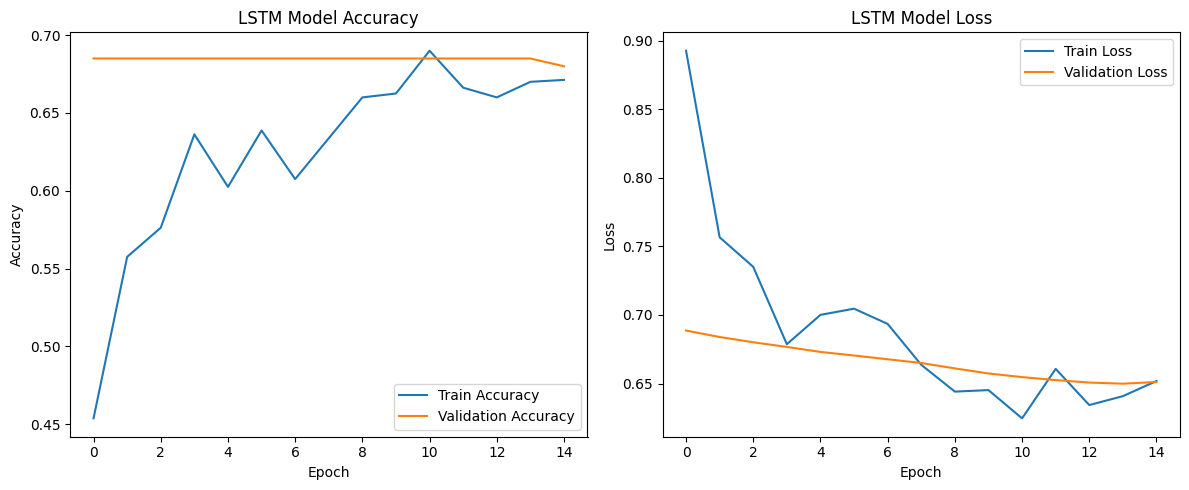

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# --------------- Load and Preprocess Data -----------------

df = pd.read_csv("/content/Diabetes_prediction.csv")

if "ID" in df.columns:
    df = df.drop(columns=["ID"])

X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = np.expand_dims(X_scaled, axis=1)  # (samples, time_steps=1, features)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# --------------- Build Improved LSTM Model -----------------

model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.2),

    Bidirectional(LSTM(64, return_sequences=False)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# --------------- Callbacks -----------------

checkpoint = ModelCheckpoint("best_lstm_model.h5", monitor='val_loss', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, verbose=1)

# --------------- Train Model -----------------

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    batch_size=32,
    callbacks=[checkpoint, early_stopping, reduce_lr]
)

# --------------- Evaluate -----------------

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# --------------- Plot -----------------

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("LSTM Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("LSTM Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5297 - loss: 0.7780
Epoch 1: val_loss improved from inf to 0.69130, saving model to best_lstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.5299 - loss: 0.7779 - val_accuracy: 0.6100 - val_loss: 0.6913 - learning_rate: 1.0000e-05
Epoch 2/15
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5683 - loss: 0.7572
Epoch 2: val_loss improved from 0.69130 to 0.68969, saving model to best_lstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5689 - loss: 0.7559 - val_accuracy: 0.6300 - val_loss: 0.6897 - learning_rate: 1.0000e-05
Epoch 3/15
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5524 - loss: 0.7620
Epoch 3: val_loss improved from 0.68969 to 0.68811, saving model to best_lstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5521 - loss: 0.7605 - val_accuracy: 0.6500 - val_loss: 0.6881 - learning_rate: 1.0000e-05
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6005 - loss: 0.6906
Epoch 4: val_loss improved from 0.68811 to 0.68664, saving model to best_lstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.6005 - loss: 0.6913 - val_accuracy: 0.6650 - val_loss: 0.6866 - learning_rate: 1.0000e-05
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5324 - loss: 0.7346
Epoch 5: val_loss improved from 0.68664 to 0.68467, saving model to best_lstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5334 - loss: 0.7343 - val_accuracy: 0.6750 - val_loss: 0.6847 - learning_rate: 1.0000e-05
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5500 - loss: 0.7281
Epoch 6: val_loss improved from 0.68467 to 0.68312, saving model to best_lstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5502 - loss: 0.7283 - val_accuracy: 0.6650 - val_loss: 0.6831 - learning_rate: 1.0000e-05
Epoch 7/15
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5662 - loss: 0.7095
Epoch 7: val_loss improved from 0.68312 to 0.68122, saving model to best_lstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5684 - loss: 0.7110 - val_accuracy: 0.6650 - val_loss: 0.6812 - learning_rate: 1.0000e-05
Epoch 8/15
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5376 - loss: 0.7614
Epoch 8: val_loss improved from 0.68122 to 0.67948, saving model to best_lstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5426 - loss: 0.7554 - val_accuracy: 0.6500 - val_loss: 0.6795 - learning_rate: 1.0000e-05
Epoch 9/15
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5625 - loss: 0.7513
Epoch 9: val_loss improved from 0.67948 to 0.67759, saving model to best_lstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5654 - loss: 0.7458 - val_accuracy: 0.6400 - val_loss: 0.6776 - learning_rate: 1.0000e-05
Epoch 10/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5904 - loss: 0.7095
Epoch 10: val_loss improved from 0.67759 to 0.67573, saving model to best_lstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5898 - loss: 0.7104 - val_accuracy: 0.6400 - val_loss: 0.6757 - learning_rate: 1.0000e-05
Epoch 11/15
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5731 - loss: 0.7224
Epoch 11: val_loss improved from 0.67573 to 0.67380, saving model to best_lstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5732 - loss: 0.7233 - val_accuracy: 0.6400 - val_loss: 0.6738 - learning_rate: 1.0000e-05
Epoch 12/15
24/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6018 - loss: 0.7141
Epoch 12: val_loss improved from 0.67380 to 0.67168, saving model to best_lstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6012 - loss: 0.7144 - val_accuracy: 0.6400 - val_loss: 0.6717 - learning_rate: 1.0000e-05
Epoch 13/15
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5770 - loss: 0.7318
Epoch 13: val_loss improved from 0.67168 to 0.66964, saving model to best_lstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5769 - loss: 0.7277 - val_accuracy: 0.6400 - val_loss: 0.6696 - learning_rate: 1.0000e-05
Epoch 14/15
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5837 - loss: 0.6882
Epoch 14: val_loss improved from 0.66964 to 0.66784, saving model to best_lstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5881 - loss: 0.6867 - val_accuracy: 0.6400 - val_loss: 0.6678 - learning_rate: 1.0000e-05
Epoch 15/15
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5935 - loss: 0.7067
Epoch 15: val_loss improved from 0.66784 to 0.66591, saving model to best_lstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5938 - loss: 0.7090 - val_accuracy: 0.6450 - val_loss: 0.6659 - learning_rate: 1.0000e-05
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6352 - loss: 0.6701 
Test Accuracy: 0.6450


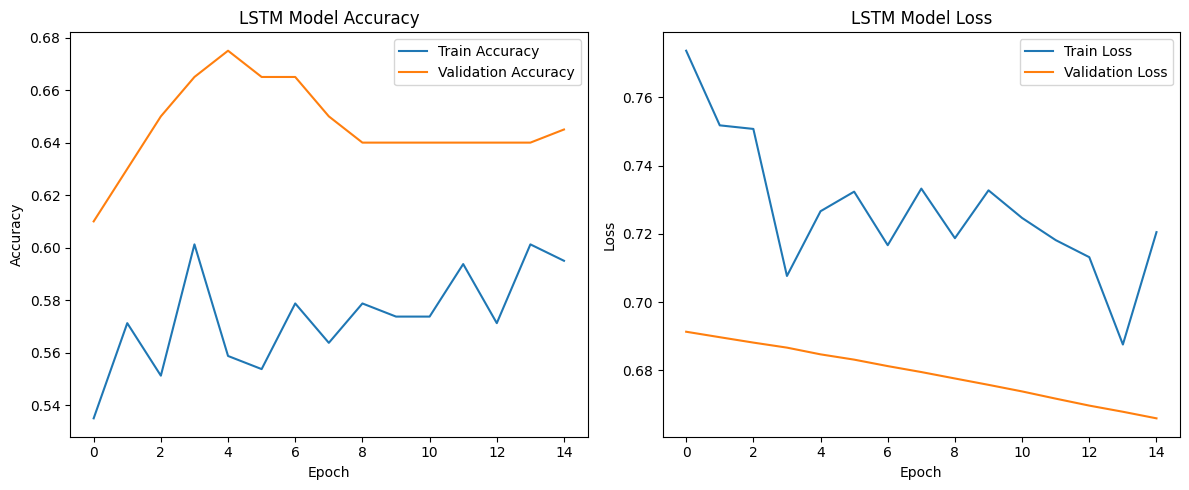

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# --------------- Load and Preprocess Data -----------------

df = pd.read_csv("/content/Diabetes_prediction.csv")

if "ID" in df.columns:
    df = df.drop(columns=["ID"])

X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = np.expand_dims(X_scaled, axis=1)  # (samples, time_steps=1, features)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# --------------- Build Improved LSTM Model -----------------

model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.2),

    Bidirectional(LSTM(64, return_sequences=False)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.00001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# --------------- Callbacks -----------------

checkpoint = ModelCheckpoint("best_lstm_model.h5", monitor='val_loss', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, verbose=1)

# --------------- Train Model -----------------

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    batch_size=32,
    callbacks=[checkpoint, early_stopping, reduce_lr]
)

# --------------- Evaluate -----------------

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# --------------- Plot -----------------

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("LSTM Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("LSTM Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5261 - loss: 0.9403
Epoch 1: val_loss improved from inf to 0.67292, saving model to best_lstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.5348 - loss: 0.9213 - val_accuracy: 0.6850 - val_loss: 0.6729 - learning_rate: 0.0100
Epoch 2/15
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6485 - loss: 0.6492
Epoch 2: val_loss improved from 0.67292 to 0.66506, saving model to best_lstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6519 - loss: 0.6478 - val_accuracy: 0.6850 - val_loss: 0.6651 - learning_rate: 0.0100
Epoch 3/15
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7118 - loss: 0.5899
Epoch 3: val_loss improved from 0.66506 to 0.65561, saving model to best_lstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7101 - loss: 0.5927 - val_accuracy: 0.6850 - val_loss: 0.6556 - learning_rate: 0.0100
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7105 - loss: 0.5768
Epoch 4: val_loss improved from 0.65561 to 0.64840, saving model to best_lstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7105 - loss: 0.5769 - val_accuracy: 0.6850 - val_loss: 0.6484 - learning_rate: 0.0100
Epoch 5/15
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7166 - loss: 0.5343
Epoch 5: val_loss did not improve from 0.64840
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7149 - loss: 0.5396 - val_accuracy: 0.6900 - val_loss: 0.6556 - learning_rate: 0.0100
Epoch 6/15
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7319 - loss: 0.5544
Epoch 6: val_loss improved from 0.64840 to 0.64593, saving model to best_lstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7274 - loss: 0.5590 - val_accuracy: 0.6800 - val_loss: 0.6459 - learning_rate: 0.0100
Epoch 7/15
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6882 - loss: 0.5654
Epoch 7: val_loss did not improve from 0.64593
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6895 - loss: 0.5644 - val_accuracy: 0.6850 - val_loss: 0.6573 - learning_rate: 0.0100
Epoch 8/15
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7318 - loss: 0.5383
Epoch 8: val_loss did not improve from 0.64593
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7301 - loss: 0.5420 - val_accuracy: 0.6450 - val_loss: 0.6702 - learning_rate: 0.0100
Epoch 9/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7324 - loss: 0.5827
Epoch 9: val_loss did not improve from 0.64593
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7318 - loss: 0.5829 - val_accuracy: 0.6800 - val_loss: 0.6576 - learning_rate: 0.0100
Epoch 10/15
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11

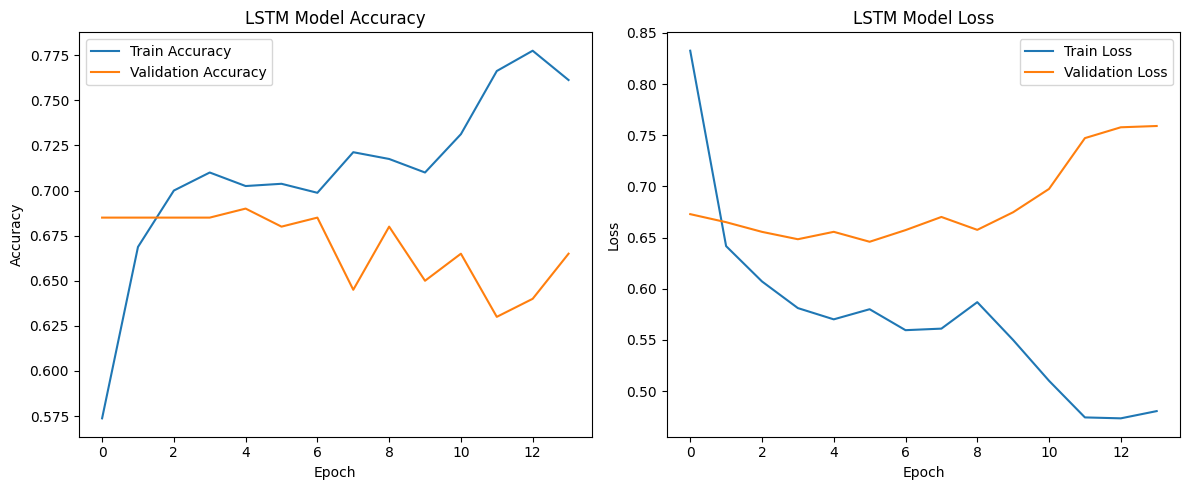

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# --------------- Load and Preprocess Data -----------------

df = pd.read_csv("/content/Diabetes_prediction.csv")

if "ID" in df.columns:
    df = df.drop(columns=["ID"])

X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = np.expand_dims(X_scaled, axis=1)  # (samples, time_steps=1, features)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# --------------- Build Improved LSTM Model -----------------

model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.2),

    Bidirectional(LSTM(64, return_sequences=False)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# --------------- Callbacks -----------------

checkpoint = ModelCheckpoint("best_lstm_model.h5", monitor='val_loss', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, verbose=1)

# --------------- Train Model -----------------

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    batch_size=32,
    callbacks=[checkpoint, early_stopping, reduce_lr]
)

# --------------- Evaluate -----------------

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# --------------- Plot -----------------

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("LSTM Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("LSTM Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5438 - loss: 1.3991
Epoch 1: val_loss improved from inf to 0.64723, saving model to best_lstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 0.5530 - loss: 1.3523 - val_accuracy: 0.6850 - val_loss: 0.6472 - learning_rate: 0.1000
Epoch 2/15
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6627 - loss: 0.6474
Epoch 2: val_loss improved from 0.64723 to 0.62299, saving model to best_lstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6650 - loss: 0.6451 - val_accuracy: 0.6850 - val_loss: 0.6230 - learning_rate: 0.1000
Epoch 3/15
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6644 - loss: 0.6375
Epoch 3: val_loss did not improve from 0.62299
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6688 - loss: 0.6362 - val_accuracy: 0.6850 - val_loss: 0.6247 - learning_rate: 0.1000
Epoch 4/15
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7043 - loss: 0.6078
Epoch 4: val_loss did not improve from 0.62299
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7031 - loss: 0.6088 - val_accuracy: 0.6850 - val_loss: 0.6235 - learning_rate: 0.1000
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6779 - loss: 0.6297
Epoch 5: val_loss did not improve from 0.62299
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6786 - loss: 0.6292 - val_accuracy: 0.6850 - val_loss: 0.6238 - learning_rate: 0.1000
Epoch 6/15
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10m

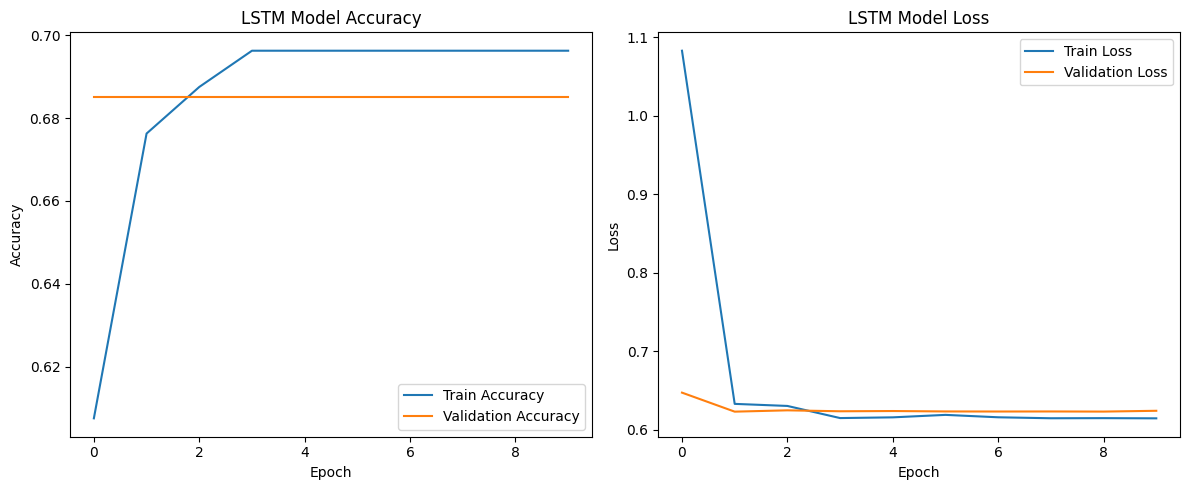

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# --------------- Load and Preprocess Data -----------------

df = pd.read_csv("/content/Diabetes_prediction.csv")

if "ID" in df.columns:
    df = df.drop(columns=["ID"])

X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = np.expand_dims(X_scaled, axis=1)  # (samples, time_steps=1, features)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# --------------- Build Improved LSTM Model -----------------

model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.2),

    Bidirectional(LSTM(64, return_sequences=False)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# --------------- Callbacks -----------------

checkpoint = ModelCheckpoint("best_lstm_model.h5", monitor='val_loss', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, verbose=1)

# --------------- Train Model -----------------

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    batch_size=32,
    callbacks=[checkpoint, early_stopping, reduce_lr]
)

# --------------- Evaluate -----------------

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# --------------- Plot -----------------

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("LSTM Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("LSTM Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.4954 - loss: 0.9419 - val_accuracy: 0.5950 - val_loss: 0.6771 - learning_rate: 0.0010
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5737 - loss: 0.7687 - val_accuracy: 0.6050 - val_loss: 0.6654 - learning_rate: 0.0010
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5752 - loss: 0.7518 - val_accuracy: 0.6550 - val_loss: 0.6512 - learning_rate: 0.0010
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6299 - loss: 0.6882 - val_accuracy: 0.6200 - val_loss: 0.6757 - learning_rate: 0.0010
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6206 - loss: 0.6847 - val_accuracy: 0.6100 - val_loss: 0.6891 - learning_rate: 0.0010
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6200 - loss: 0.7000 - val_accuracy: 0.6200 - val_loss: 0.6938 - learning_rate: 0.0010
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6886 - loss: 0.6314 - val_accuracy: 0.6250 - v

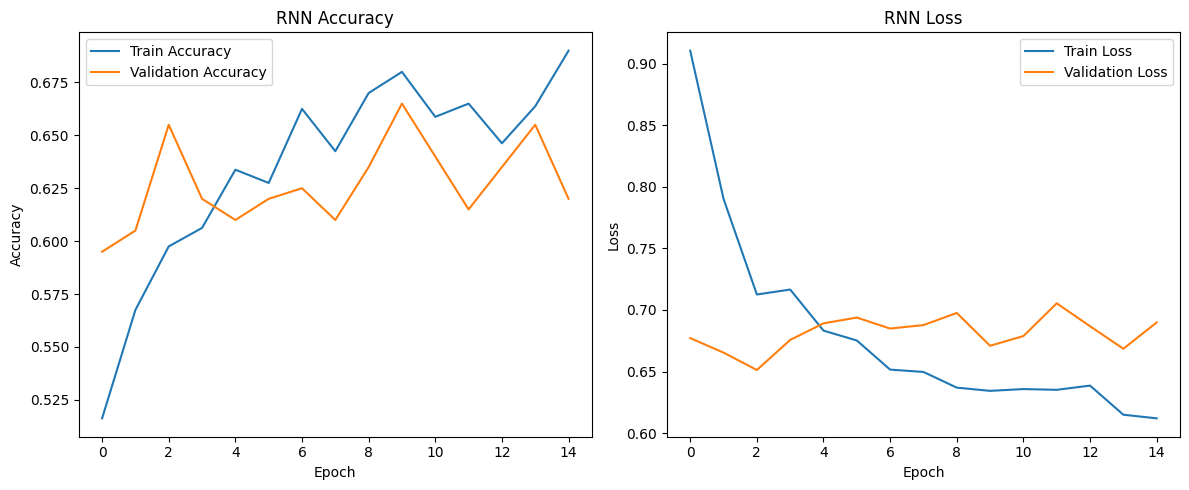

In [ ]:
# 📚 Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# 📥 Load Data
df = pd.read_csv("/content/Diabetes_prediction.csv")  # update path if needed

if "ID" in df.columns:
    df = df.drop(columns=["ID"])

# 📊 Split Features and Target
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

# 🔥 Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = np.expand_dims(X_scaled, axis=1)  # shape: (samples, time_steps=1, features)

# 🧹 Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 🏗 Build RNN Model
model = Sequential([
    SimpleRNN(256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.2),

    SimpleRNN(128, return_sequences=False),
    BatchNormalization(),
    Dropout(0.2),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='sigmoid')  # Binary output
])

# ⚙️ Compile Model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 🛑 Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)

# 🏋️‍♂️ Train Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    batch_size=16,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# 🧪 Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# 📈 Plot Results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("RNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("RNN Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.4828 - loss: 0.9898 - val_accuracy: 0.6050 - val_loss: 0.6842 - learning_rate: 1.0000e-04
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5208 - loss: 0.9272 - val_accuracy: 0.6050 - val_loss: 0.6884 - learning_rate: 1.0000e-04
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5040 - loss: 0.9192 - val_accuracy: 0.6200 - val_loss: 0.6790 - learning_rate: 1.0000e-04
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5351 - loss: 0.8043 - val_accuracy: 0.5900 - val_loss: 0.6796 - learning_rate: 1.0000e-04
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5175 - loss: 0.8108 - val_accuracy: 0.5500 - val_loss: 0.6902 - learning_rate: 1.0000e-04
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5244 - loss: 0.8298 - val_accuracy: 0.5400 - val_loss: 0.6992 - learning_rate: 1.0000e-04
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5700 - loss: 0.7733 - 

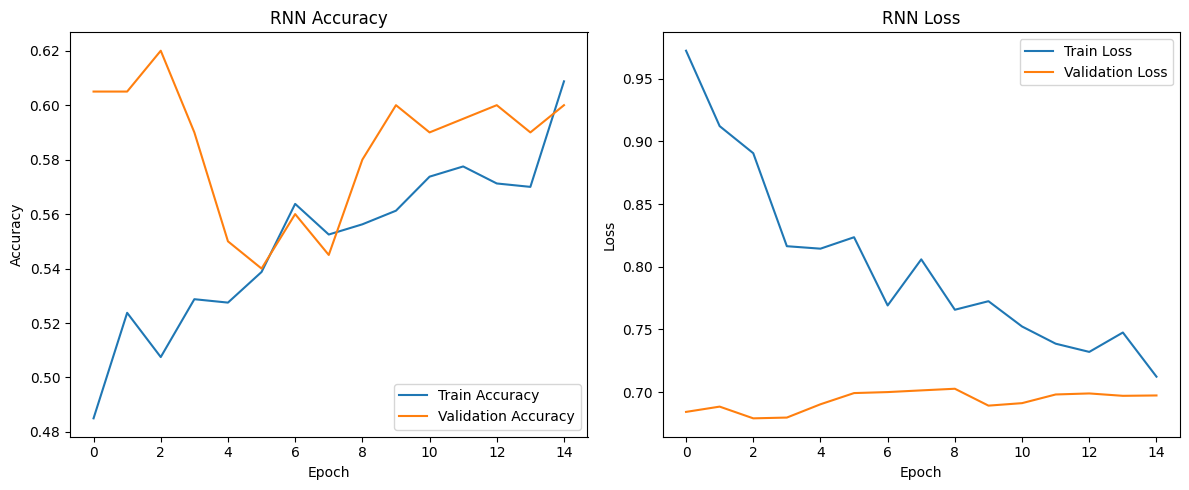

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# 📥 Load Data
df = pd.read_csv("/content/Diabetes_prediction.csv")  # update path if needed

if "ID" in df.columns:
    df = df.drop(columns=["ID"])

# 📊 Split Features and Target
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

# 🔥 Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = np.expand_dims(X_scaled, axis=1)  # shape: (samples, time_steps=1, features)

# 🧹 Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 🏗 Build RNN Model
model = Sequential([
    SimpleRNN(256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.2),

    SimpleRNN(128, return_sequences=False),
    BatchNormalization(),
    Dropout(0.2),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='sigmoid')  # Binary output
])

# ⚙️ Compile Model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 🛑 Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)

# 🏋️‍♂️ Train Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    batch_size=16,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# 🧪 Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# 📈 Plot Results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("RNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("RNN Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.4966 - loss: 0.9348 - val_accuracy: 0.4900 - val_loss: 0.6919 - learning_rate: 1.0000e-05
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4963 - loss: 0.9208 - val_accuracy: 0.4950 - val_loss: 0.6871 - learning_rate: 1.0000e-05
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5288 - loss: 0.8771 - val_accuracy: 0.5050 - val_loss: 0.6951 - learning_rate: 1.0000e-05
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5393 - loss: 0.8594 - val_accuracy: 0.4800 - val_loss: 0.7105 - learning_rate: 1.0000e-05
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5172 - loss: 0.8968 - val_accuracy: 0.4800 - val_loss: 0.7234 - learning_rate: 1.0000e-05
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4990 - loss: 0.9057 - val_accuracy: 0.4750 - val_loss: 0.7391 - learning_rate: 1.0000e-05
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5029 - loss: 0.8914

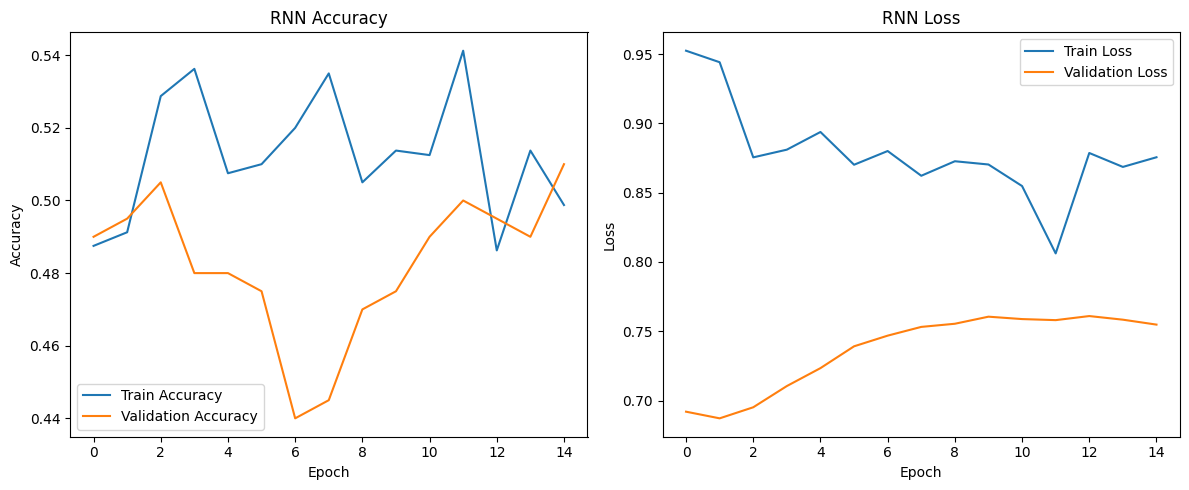

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# 📥 Load Data
df = pd.read_csv("/content/Diabetes_prediction.csv")  # update path if needed

if "ID" in df.columns:
    df = df.drop(columns=["ID"])

# 📊 Split Features and Target
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

# 🔥 Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = np.expand_dims(X_scaled, axis=1)  # shape: (samples, time_steps=1, features)

# 🧹 Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 🏗 Build RNN Model
model = Sequential([
    SimpleRNN(256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.2),

    SimpleRNN(128, return_sequences=False),
    BatchNormalization(),
    Dropout(0.2),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='sigmoid')  # Binary output
])

# ⚙️ Compile Model
optimizer = Adam(learning_rate=0.00001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 🛑 Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)

# 🏋️‍♂️ Train Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    batch_size=16,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# 🧪 Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# 📈 Plot Results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("RNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("RNN Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5493 - loss: 0.9349 - val_accuracy: 0.5400 - val_loss: 0.7408 - learning_rate: 0.0100
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6668 - loss: 0.6417 - val_accuracy: 0.5800 - val_loss: 0.7355 - learning_rate: 0.0100
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6881 - loss: 0.6226 - val_accuracy: 0.6450 - val_loss: 0.6939 - learning_rate: 0.0100
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6943 - loss: 0.6090 - val_accuracy: 0.6600 - val_loss: 0.6710 - learning_rate: 0.0100
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6706 - loss: 0.6251 - val_accuracy: 0.6500 - val_loss: 0.6826 - learning_rate: 0.0100
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6723 - loss: 0.6268 - val_accuracy: 0.6800 - val_loss: 0.6604 - learning_rate: 0.0100
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6637 - loss: 0.6080 - val_accuracy: 0.6700 

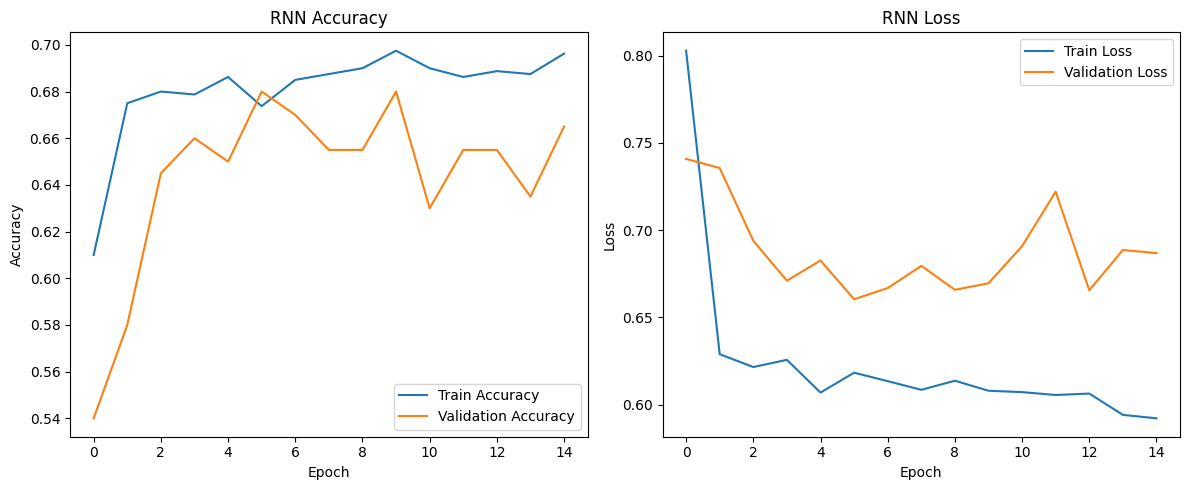

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# 📥 Load Data
df = pd.read_csv("/content/Diabetes_prediction.csv")  # update path if needed

if "ID" in df.columns:
    df = df.drop(columns=["ID"])

# 📊 Split Features and Target
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

# 🔥 Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = np.expand_dims(X_scaled, axis=1)  # shape: (samples, time_steps=1, features)

# 🧹 Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 🏗 Build RNN Model
model = Sequential([
    SimpleRNN(256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.2),

    SimpleRNN(128, return_sequences=False),
    BatchNormalization(),
    Dropout(0.2),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='sigmoid')  # Binary output
])

# ⚙️ Compile Model
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 🛑 Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)

# 🏋️‍♂️ Train Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    batch_size=16,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# 🧪 Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# 📈 Plot Results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("RNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("RNN Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.6114 - loss: 0.9505 - val_accuracy: 0.3650 - val_loss: 0.8802 - learning_rate: 0.1000
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6227 - loss: 0.6686 - val_accuracy: 0.6850 - val_loss: 0.6235 - learning_rate: 0.1000
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6954 - loss: 0.6213 - val_accuracy: 0.6550 - val_loss: 0.6327 - learning_rate: 0.1000
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5984 - loss: 0.6779 - val_accuracy: 0.6850 - val_loss: 0.6624 - learning_rate: 0.1000
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6838 - loss: 0.6541 - val_accuracy: 0.6800 - val_loss: 0.6512 - learning_rate: 0.1000
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6624 - loss: 0.6663 - val_accuracy: 0.4500 - val_loss: 0.9161 - learning_rate: 0.1000
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6925 - loss: 0.6285 - val_accuracy:

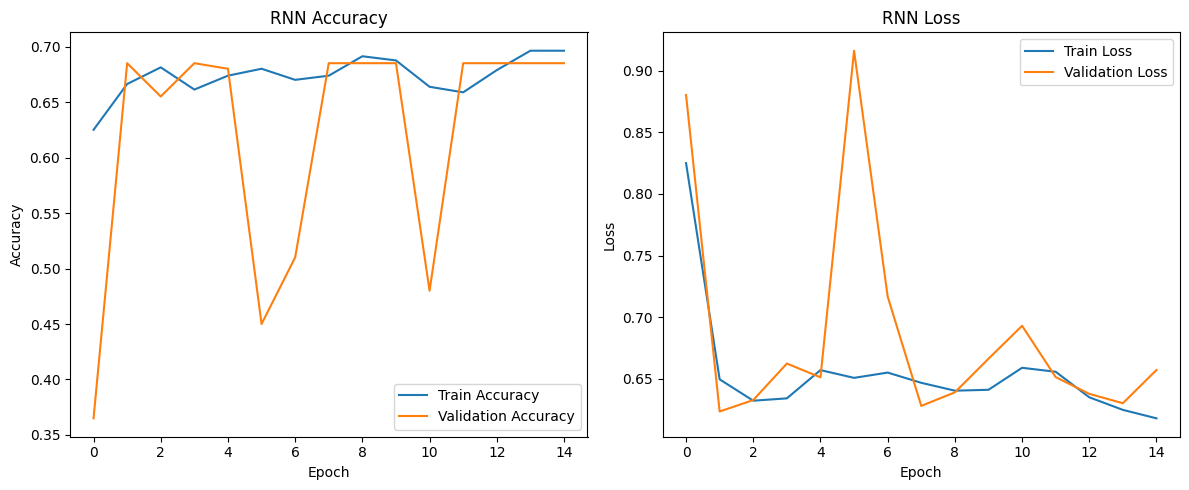

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# 📥 Load Data
df = pd.read_csv("/content/Diabetes_prediction.csv")  # update path if needed

if "ID" in df.columns:
    df = df.drop(columns=["ID"])

# 📊 Split Features and Target
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

# 🔥 Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = np.expand_dims(X_scaled, axis=1)  # shape: (samples, time_steps=1, features)

# 🧹 Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 🏗 Build RNN Model
model = Sequential([
    SimpleRNN(256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.2),

    SimpleRNN(128, return_sequences=False),
    BatchNormalization(),
    Dropout(0.2),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='sigmoid')  # Binary output
])

# ⚙️ Compile Model
optimizer = Adam(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# 🛑 Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)

# 🏋️‍♂️ Train Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    batch_size=16,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# 🧪 Evaluate Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# 📈 Plot Results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("RNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("RNN Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5593 - loss: 0.6822
Epoch 1: val_accuracy improved from -inf to 0.68500, saving model to best_ann_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5725 - loss: 0.6777 - val_accuracy: 0.6850 - val_loss: 0.6359
Epoch 2/10
20/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7027 - loss: 0.6163  
Epoch 2: val_accuracy did not improve from 0.68500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7020 - loss: 0.6179 - val_accuracy: 0.6850 - val_loss: 0.6372
Epoch 3/10
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6840 - loss: 0.6282 
Epoch 3: val_accuracy did not improve from 0.68500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6853 - loss: 0.6267 - val_accuracy: 0.6850 - val_loss: 0.6435
Epoch 4/10
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6725 - loss: 0.6342 
Epoch 4: val_accuracy did not improve from 0.68500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6758 - loss: 0.6333 - val_accuracy: 0.6850 - val_loss: 0.6468
Epoch 5/10
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6701 - loss: 0.6385 
Epoch 5: val_accuracy did not improve from 0.

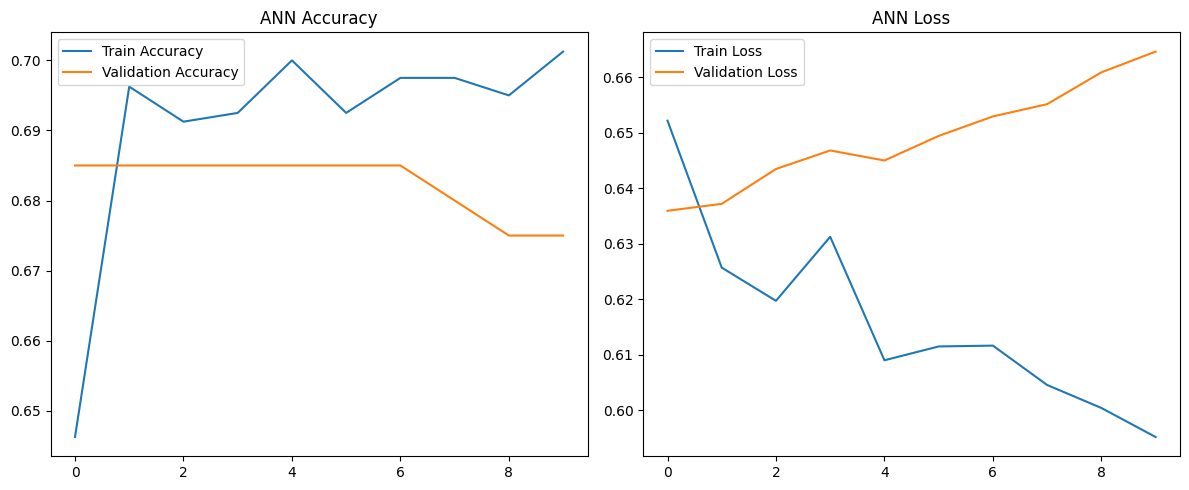

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Load dataset
df = pd.read_csv("/content/Diabetes_prediction.csv")

# Drop 'ID' if present
if 'ID' in df.columns:
    df = df.drop(columns=['ID'])

# Encode categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Features and target
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build ANN Model
model = Sequential([
    # Input layer (same size as the number of features)
    Dense(64, activation='relu', input_dim=X_scaled.shape[1]),
    Dropout(0.3),  # Dropout to prevent overfitting

    # Hidden layer 1
    Dense(128, activation='relu'),
    Dropout(0.3),

    # Hidden layer 2
    Dense(64, activation='relu'),
    Dropout(0.3),

    # Output layer (1 neuron for binary classification)
    Dense(1, activation='sigmoid')  # Sigmoid function for binary classification
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Model Checkpoint (Save the best model based on validation accuracy)
checkpoint = ModelCheckpoint("best_ann_model.h5", monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    callbacks=[checkpoint],
    verbose=1
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot the accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("ANN Accuracy")
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("ANN Loss")
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4222 - loss: 0.7482
Epoch 1: val_accuracy improved from -inf to 0.48500, saving model to best_ann_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.4229 - loss: 0.7469 - val_accuracy: 0.4850 - val_loss: 0.6938
Epoch 2/10
14/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4660 - loss: 0.7109 
Epoch 2: val_accuracy improved from 0.48500 to 0.61000, saving model to best_ann_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4745 - loss: 0.7076 - val_accuracy: 0.6100 - val_loss: 0.6725
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5772 - loss: 0.6775
Epoch 3: val_accuracy improved from 0.61000 to 0.67000, saving model to best_ann_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5775 - loss: 0.6775 - val_accuracy: 0.6700 - val_loss: 0.6573
Epoch 4/10
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6288 - loss: 0.6672  
Epoch 4: val_accuracy improved from 0.67000 to 0.69000, saving model to best_ann_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6283 - loss: 0.6655 - val_accuracy: 0.6900 - val_loss: 0.6488
Epoch 5/10
20/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6677 - loss: 0.6460 
Epoch 5: val_accuracy did not improve from 0.69000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6703 - loss: 0.6443 - val_accuracy: 0.6850 - val_loss: 0.6422
Epoch 6/10
20/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6708 - loss: 0.6396  
Epoch 6: val_accuracy did not improve from 0.69000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6726 - loss: 0.6388 - val_accuracy: 0.6850 - val_loss: 0.6389
Epoch 7/10
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6538 - loss: 0.6492 
Epoch 7: val_accuracy did not improve from 0.69000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6578 - loss: 0.6481 - val_accuracy: 0.6850 - val_loss: 0.6373
Epoch 8/10
19/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7023 - loss: 0.6152 
Epoch 8: val_accuracy did not improve from 0.6

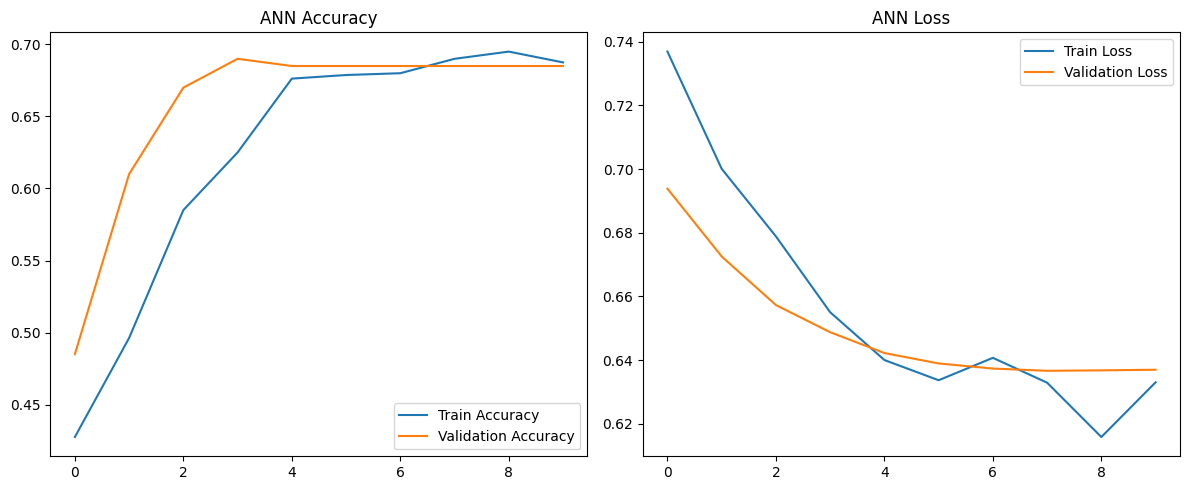

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Load dataset
df = pd.read_csv("/content/Diabetes_prediction.csv")

# Drop 'ID' if present
if 'ID' in df.columns:
    df = df.drop(columns=['ID'])

# Encode categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Features and target
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build ANN Model
model = Sequential([
    # Input layer (same size as the number of features)
    Dense(64, activation='relu', input_dim=X_scaled.shape[1]),
    Dropout(0.3),  # Dropout to prevent overfitting

    # Hidden layer 1
    Dense(128, activation='relu'),
    Dropout(0.3),

    # Hidden layer 2
    Dense(64, activation='relu'),
    Dropout(0.3),

    # Output layer (1 neuron for binary classification)
    Dense(1, activation='sigmoid')  # Sigmoid function for binary classification
])

# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Model Checkpoint (Save the best model based on validation accuracy)
checkpoint = ModelCheckpoint("best_ann_model.h5", monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    callbacks=[checkpoint],
    verbose=1
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot the accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("ANN Accuracy")
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("ANN Loss")
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5512 - loss: 0.6902
Epoch 1: val_accuracy improved from -inf to 0.53500, saving model to best_ann_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5507 - loss: 0.6901 - val_accuracy: 0.5350 - val_loss: 0.6951
Epoch 2/10
19/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5087 - loss: 0.6893 
Epoch 2: val_accuracy did not improve from 0.53500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5146 - loss: 0.6888 - val_accuracy: 0.5300 - val_loss: 0.6918
Epoch 3/10
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5719 - loss: 0.6738  
Epoch 3: val_accuracy improved from 0.53500 to 0.55000, saving model to best_ann_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5720 - loss: 0.6745 - val_accuracy: 0.5500 - val_loss: 0.6888
Epoch 4/10
19/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5994 - loss: 0.6723  
Epoch 4: val_accuracy improved from 0.55000 to 0.57000, saving model to best_ann_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6004 - loss: 0.6729 - val_accuracy: 0.5700 - val_loss: 0.6859
Epoch 5/10
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5999 - loss: 0.6739 
Epoch 5: val_accuracy improved from 0.57000 to 0.58500, saving model to best_ann_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5956 - loss: 0.6751 - val_accuracy: 0.5850 - val_loss: 0.6833
Epoch 6/10
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5871 - loss: 0.6722 
Epoch 6: val_accuracy improved from 0.58500 to 0.59500, saving model to best_ann_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5902 - loss: 0.6716 - val_accuracy: 0.5950 - val_loss: 0.6808
Epoch 7/10
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5695 - loss: 0.6728  
Epoch 7: val_accuracy improved from 0.59500 to 0.60000, saving model to best_ann_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5729 - loss: 0.6732 - val_accuracy: 0.6000 - val_loss: 0.6784
Epoch 8/10
20/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6512 - loss: 0.6537 
Epoch 8: val_accuracy did not improve from 0.60000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6473 - loss: 0.6551 - val_accuracy: 0.6000 - val_loss: 0.6762
Epoch 9/10
16/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6240 - loss: 0.6727 
Epoch 9: val_accuracy improved from 0.60000 to 0.61500, saving model to best_ann_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6299 - loss: 0.6677 - val_accuracy: 0.6150 - val_loss: 0.6741
Epoch 10/10
22/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6186 - loss: 0.6595 
Epoch 10: val_accuracy did not improve from 0.61500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6195 - loss: 0.6592 - val_accuracy: 0.6150 - val_loss: 0.6721
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6037 - loss: 0.6743 
Test Accuracy: 61.50%


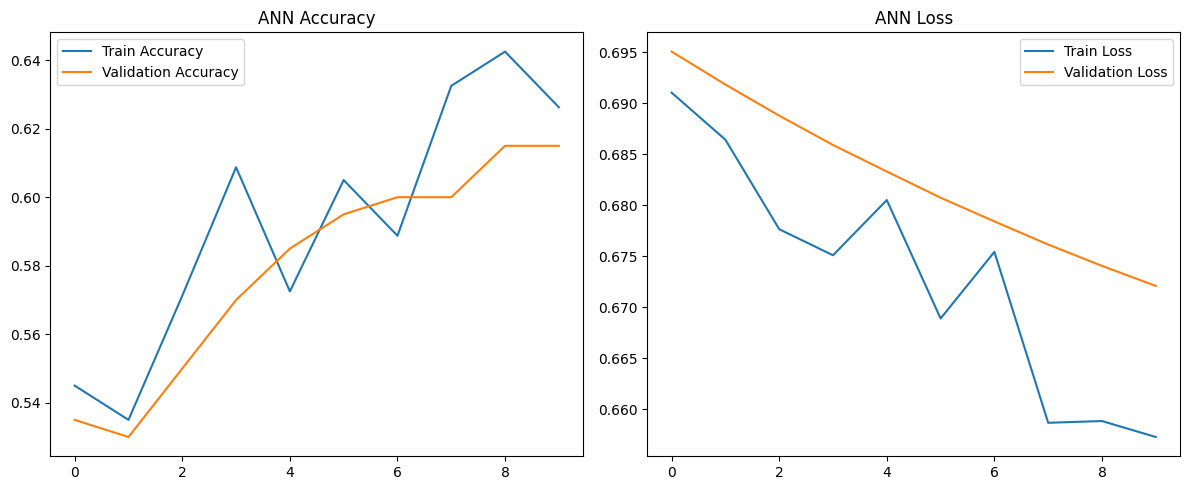

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Load dataset
df = pd.read_csv("/content/Diabetes_prediction.csv")

# Drop 'ID' if present
if 'ID' in df.columns:
    df = df.drop(columns=['ID'])

# Encode categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Features and target
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build ANN Model
model = Sequential([
    # Input layer (same size as the number of features)
    Dense(64, activation='relu', input_dim=X_scaled.shape[1]),
    Dropout(0.3),  # Dropout to prevent overfitting

    # Hidden layer 1
    Dense(128, activation='relu'),
    Dropout(0.3),

    # Hidden layer 2
    Dense(64, activation='relu'),
    Dropout(0.3),

    # Output layer (1 neuron for binary classification)
    Dense(1, activation='sigmoid')  # Sigmoid function for binary classification
])

# Compile the model
optimizer = Adam(learning_rate=0.00001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Model Checkpoint (Save the best model based on validation accuracy)
checkpoint = ModelCheckpoint("best_ann_model.h5", monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    callbacks=[checkpoint],
    verbose=1
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot the accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("ANN Accuracy")
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("ANN Loss")
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6371 - loss: 0.6612
Epoch 1: val_accuracy improved from -inf to 0.68500, saving model to best_ann_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.6386 - loss: 0.6609 - val_accuracy: 0.6850 - val_loss: 0.6591
Epoch 2/10
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6999 - loss: 0.6083 
Epoch 2: val_accuracy did not improve from 0.68500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6995 - loss: 0.6104 - val_accuracy: 0.6850 - val_loss: 0.6438
Epoch 3/10
20/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7071 - loss: 0.6071
Epoch 3: val_accuracy did not improve from 0.68500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7046 - loss: 0.6085 - val_accuracy: 0.6850 - val_loss: 0.6517
Epoch 4/10
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6651 - loss: 0.6214
Epoch 4: val_accuracy did not improve from 0.68500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6683 - loss: 0.6200 - val_accuracy: 0.6850 - val_loss: 0.6661
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6644 - loss: 0.6498
Epoch 5: val_accuracy did not improve from 0.68

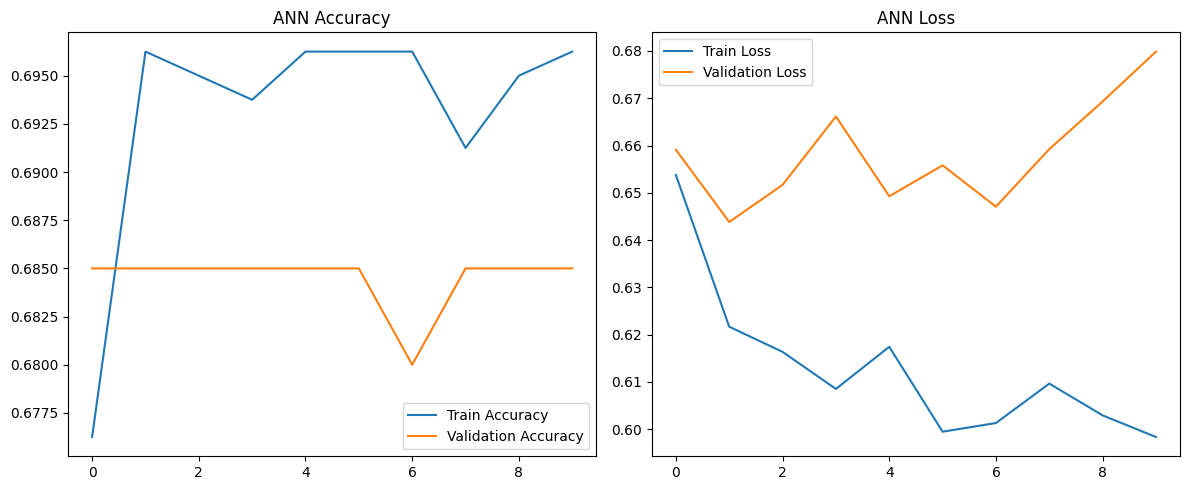

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Load dataset
df = pd.read_csv("/content/Diabetes_prediction.csv")

# Drop 'ID' if present
if 'ID' in df.columns:
    df = df.drop(columns=['ID'])

# Encode categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Features and target
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build ANN Model
model = Sequential([
    # Input layer (same size as the number of features)
    Dense(64, activation='relu', input_dim=X_scaled.shape[1]),
    Dropout(0.3),  # Dropout to prevent overfitting

    # Hidden layer 1
    Dense(128, activation='relu'),
    Dropout(0.3),

    # Hidden layer 2
    Dense(64, activation='relu'),
    Dropout(0.3),

    # Output layer (1 neuron for binary classification)
    Dense(1, activation='sigmoid')  # Sigmoid function for binary classification
])

# Compile the model
optimizer = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Model Checkpoint (Save the best model based on validation accuracy)
checkpoint = ModelCheckpoint("best_ann_model.h5", monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    callbacks=[checkpoint],
    verbose=1
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot the accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("ANN Accuracy")
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("ANN Loss")
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5476 - loss: 2.0989
Epoch 1: val_accuracy improved from -inf to 0.68500, saving model to best_ann_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.5760 - loss: 1.8105 - val_accuracy: 0.6850 - val_loss: 0.6991
Epoch 2/10
23/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6739 - loss: 0.7436
Epoch 2: val_accuracy did not improve from 0.68500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6742 - loss: 0.7387 - val_accuracy: 0.6850 - val_loss: 0.6223
Epoch 3/10
20/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6414 - loss: 0.7053 
Epoch 3: val_accuracy did not improve from 0.68500
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6527 - loss: 0.6983 - val_accuracy: 0.6850 - val_loss: 0.6283
Epoch 4/10
21/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6967 - loss: 0.6258
Epoch 4: val_accuracy did not improve from 0.68500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6966 - loss: 0.6262 - val_accuracy: 0.6850 - val_loss: 0.6231
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6919 - loss: 0.6611
Epoch 5: val_accuracy did not improve from 0.6

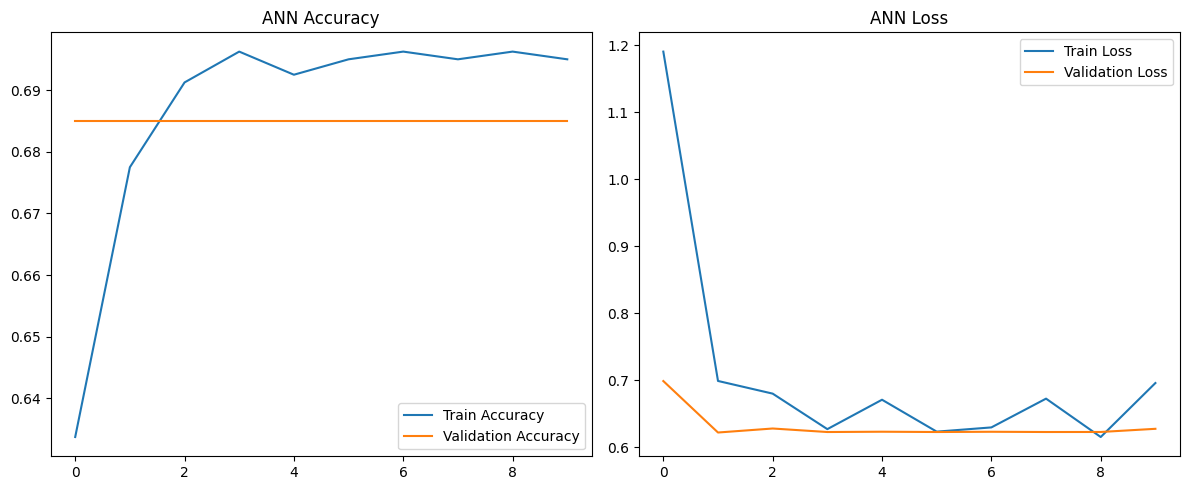

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Load dataset
df = pd.read_csv("/content/Diabetes_prediction.csv")

# Drop 'ID' if present
if 'ID' in df.columns:
    df = df.drop(columns=['ID'])

# Encode categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Features and target
X = df.drop(columns=["Diagnosis"])
y = df["Diagnosis"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build ANN Model
model = Sequential([
    # Input layer (same size as the number of features)
    Dense(64, activation='relu', input_dim=X_scaled.shape[1]),
    Dropout(0.3),  # Dropout to prevent overfitting

    # Hidden layer 1
    Dense(128, activation='relu'),
    Dropout(0.3),

    # Hidden layer 2
    Dense(64, activation='relu'),
    Dropout(0.3),

    # Output layer (1 neuron for binary classification)
    Dense(1, activation='sigmoid')  # Sigmoid function for binary classification
])

# Compile the model
optimizer = Adam(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Model Checkpoint (Save the best model based on validation accuracy)
checkpoint = ModelCheckpoint("best_ann_model.h5", monitor='val_accuracy', save_best_only=True, verbose=1)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    callbacks=[checkpoint],
    verbose=1
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Plot the accuracy and loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("ANN Accuracy")
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("ANN Loss")
plt.legend()

plt.tight_layout()
plt.show()
